Practice the features of NumPy. Use of for loops is prohibited.

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=False)

X = california_housing.data
y = california_housing.target

In [37]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [38]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### 1. Preprocessing

The first task is to open the dataset and preprocess it into the form that the model can understand. It involves imputation, train_test_split, standardization, and normalization. Some functions are already covered by the first lab, so if you finished the lab before, you can freely bring your code here to finish your homework.



Develop both standardization and normalization functions. 

- Standardization: Make features have the same standard deviaton and mean.

- Normalization: Make the range of value normalized into [0, 1]. This means that each column's minimum value should be zero and maximum value should be one.

In [39]:
def standardize(data):
  """
  Input: NumPy ndarray
  Output: NumPy ndarray with column mean == 0 and std == 1
  """
  data_standartized = (data-data.mean(axis=0))/data.std(axis=0)
  
  return data_standartized

def normalize(data):
  """"
  Input: NumPy ndarray
  Output: NumPy ndarray with column min == 0 and max == 1
  """
  data_min = np.min(data, axis = 0)
  data_max = np.max(data, axis = 0)
  data_normalized= (data - data_min)/(data_max - data_min)

  return data_normalized




Apply both functions separately and create X_standardized and X_normalized.

In [40]:
X_standardized = standardize(X)
X_normalized = normalize(X)

Create a function to check the dataset's min, max, mean, std of each feature.

In [41]:
def describe(data):
  """
  Describe four statistics of the dataset.

  Input: NumPy ndarray
  Output: vertical min, max, mean, standard deviation
  """
  return print((f"Min:{data.min(axis = 0)}\n"), (f"Max:{data.max(axis = 0)}\n"), (f"Mean:{data.mean(axis = 0)}\n"), (f"Std:{data.std(axis = 0)}\n"))

In [42]:
describe(X_standardized)

Min:[-1.77429947 -2.19618048 -1.8523186  -1.61076772 -1.25612255 -0.22899997
 -1.447568   -2.38599234]
 Max:[  5.85828581   1.85618152  55.16323628  69.57171326  30.25033022
 119.41910319   2.95806762   2.62528006]
 Mean:[ 6.60969987e-17  5.50808322e-18  6.60969987e-17 -1.06030602e-16
 -1.10161664e-17  3.44255201e-18 -1.07958431e-15 -8.52651283e-15]
 Std:[1. 1. 1. 1. 1. 1. 1. 1.]



In [43]:
describe(X_normalized)

Min:[0. 0. 0. 0. 0. 0. 0. 0.]
 Max:[1. 1. 1. 1. 1. 1. 1. 1.]
 Mean:[0.23246376 0.54195071 0.03248795 0.02262871 0.03986874 0.00191395
 0.32857188 0.47612505]
 Std:[0.13101721 0.24676966 0.01753907 0.0140484  0.03173953 0.00835784
 0.226982   0.19955012]



Check if your **standardize** and **normalize** functions are correctly working.
- **Your output should be the same as the one below.**

In [44]:
describe(X_standardized)

Min:[-1.77429947 -2.19618048 -1.8523186  -1.61076772 -1.25612255 -0.22899997
 -1.447568   -2.38599234]
 Max:[  5.85828581   1.85618152  55.16323628  69.57171326  30.25033022
 119.41910319   2.95806762   2.62528006]
 Mean:[ 6.60969987e-17  5.50808322e-18  6.60969987e-17 -1.06030602e-16
 -1.10161664e-17  3.44255201e-18 -1.07958431e-15 -8.52651283e-15]
 Std:[1. 1. 1. 1. 1. 1. 1. 1.]



In [45]:
describe(X_normalized)

Min:[0. 0. 0. 0. 0. 0. 0. 0.]
 Max:[1. 1. 1. 1. 1. 1. 1. 1.]
 Mean:[0.23246376 0.54195071 0.03248795 0.02262871 0.03986874 0.00191395
 0.32857188 0.47612505]
 Std:[0.13101721 0.24676966 0.01753907 0.0140484  0.03173953 0.00835784
 0.226982   0.19955012]



Divide the dataset into two parts: {a training set, a test set} and only use the training set to train the model. This means that you also need to create the function for it.

In [46]:
def train_test_split(X, y, test_ratio = 0.33):
  # simulation
  # cross-val

  """
  Input:
    - X: a set of features
    - y: corresponding labels
    - test_ratio: ratio of the test set

  Output:
    - X_train: separated training instances
    - X_test: separated test instances
    - y_train: separated training labels
    - y_test: separated test labels

  1. Randomly shuffle the indices of the data instances
  2. Divide the indices into two parts with the ratio of [1-test ratio:test ratio]
  3. Select training instances and labels with the first set of indices and test instances and labels with the second set of indices
  4. Return the training set and the test set
  """

  index_shuffled = np.random.permutation(len(X))

  X_shuffled = X[index_shuffled]
  y_shuffled = y[index_shuffled]

  test_amount = int(X.shape[0] * test_ratio)
  
  X_train = X_shuffled[:-test_amount]
  X_test = X_shuffled[-test_amount:]
  y_train = y_shuffled[:-test_amount]
  y_test = y_shuffled[-test_amount:]

  return X_train, X_test, y_train, y_test

Split your dataset into training and test sets with `test ratio = 0.33`.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_ratio = 0.33)

Check the shape of each subset.

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13829, 8), (6811, 8), (13829,), (6811,))

Create two functions (**apply_standardization**, **apply_normalization**) that uses training set's statistics and apply standardization or normalization to both sets.

In [49]:
def apply_standardization(X_train, X_test):
  """
  Input:
    - X_train: training instances
    - X_test: test instances

  Output:
    - X_train_standardized
    - X_test_standardized

  Use training set's mean and standard deviation to standardize both training and test sets
  """

  X_train_standartized = (X_train-X_train.mean(axis=0))/X_train.std(axis=0)
  X_test_standartized = (X_test-X_train.mean(axis=0))/X_train.std(axis=0)

  
  return  X_train_standartized, X_test_standartized

In [50]:
def apply_normalization(X_train, X_test):
  """
  Input:
    - X_train
    - X_test

  Output:
    - X_train_standardized
    - X_test_standardized
  """
  data_min = np.min(X_train, axis = 0)
  data_max = np.max(X_train, axis = 0)

  X_train_normalized = (X_train - data_min)/(data_max - data_min)
  X_test_normalized = (X_test - data_min)/(data_max - data_min) 
  
  return X_train_normalized, X_test_normalized

Apply two functions (**apply_standardization**, **apply_normalization**) to created standardized and normalized datasets.

In [51]:
X_train_standardized, X_test_standardized = apply_standardization(X_train, X_test)
X_train_normalized, X_test_normalized = apply_normalization(X_train, X_test)

Check the statistics using describe method. Test set should **NOT** have zero mean and standard deviation 1 or zero min and one max. Good test set however might show close value to zero or one.

In [52]:
describe(X_train_standardized)

Min:[-1.76397491 -2.20598138 -1.73846193 -1.28355999 -1.28013797 -0.21896017
 -1.44486064 -2.38052139]
 Max:[  5.86650122   1.86474688  51.77887687  64.74386324  31.03168447
 115.04298322   2.95667882   2.53709484]
 Mean:[-5.23778159e-15 -1.29823599e-14  1.81598816e-15 -3.92657124e-15
 -5.75836773e-15 -1.68618283e-16 -5.09544922e-15 -7.55455829e-18]
 Std:[1. 1. 1. 1. 1. 1. 1. 1.]



In [53]:
describe(X_test_standardized)

Min:[-1.76397491 -2.20598138 -1.53650241 -1.50176033 -1.27832672 -0.16767989
 -1.43550562 -2.35563467]
 Max:[ 5.86650122  1.86474688 20.6562707  27.91437316 24.58725138 55.34369702
  2.94264628  2.61673235]
 Mean:[ 0.02980165  0.00046277  0.00062667 -0.00820426  0.02452694  0.00498479
  0.0041258  -0.00364763]
 Std:[0.99886454 1.01367203 0.79971582 0.77083464 1.07540836 0.8842367
 0.99717409 0.99149393]



In [54]:
describe(X_train_normalized)

Min:[0. 0. 0. 0. 0. 0. 0. 0.]
 Max:[1. 1. 1. 1. 1. 1. 1. 1.]
 Mean:[0.23117495 0.5419132  0.03248409 0.0194398  0.03961825 0.00189967
 0.32826257 0.48408035]
 Std:[0.13105342 0.24565629 0.01868553 0.01514522 0.03094842 0.00867589
 0.22719324 0.20335056]



In [55]:
describe(X_test_normalized)

Min:[ 0.00000000e+00  0.00000000e+00  3.77372130e-03 -3.30469266e-03
  5.60553827e-05  4.44902097e-04  2.12539851e-03  5.06072874e-03]
 Max:[1.         1.         0.41845752 0.44220919 0.80055495 0.48205553
 0.9968119  1.01619433]
 Mean:[0.23508056 0.54202688 0.0324958  0.01931555 0.04037732 0.00194292
 0.32919992 0.4833386 ]
 Std:[0.13090461 0.24901491 0.01494312 0.01167446 0.03328219 0.00767154
 0.22655121 0.20162084]



### 2. Linear regression

Put your dataset to train a model.

- Create the **solver** function that creates a linear regression line and return the coefficents. You can re-use the function from the first lab.
- Here you should use **all available features** of the dataset.
- You should add one column representing a bias to your feature matrix.

The normal equation can be represented as follows:

$\theta = (\textbf{X}^T \cdot \textbf{X})^{-1} \cdot \textbf{X}^T \cdot \textbf{y}$

In [56]:
def solver(X, y):
  """
  Get the weights and bias of linear regression classifier on the input dataset (X, y).

  Input:
   - X: a set of features
   - y: labels
  Output:
   - theta: weights and bias of the linear regression
  """
  
  X = np.append(np.ones([X.shape[0],1]), X, axis = 1)

  X_transpose = np.transpose(X)
  theta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
   


  return theta

Run this solver function only on the standardized training set (**X_train_standardized**, **y_train**) to create the model and evalute it later on the test set.

- Run the **solve** function on **X_train_standardized** and **y_train** and save the result to **theta**.

In [57]:
theta = solver(X_train_standardized, y_train)
print(theta)

[ 2.05579545  0.8065735   0.11489086 -0.23754713  0.28878355 -0.00286406
 -0.04679802 -0.91081053 -0.88751449]



- Create the **predict** function which put each instance into the regression equation to predict the value.

In [58]:
def predict(X, theta):
  """
  Input:
   - X: data instances to predict
   - theta: trained regression coefficients

  Output:
   - y_hat: predicted values (X @ weight) + bias
  """
  weight = theta[1:]
  bias = theta[0]

  return (X @ weight) + bias

Create a function **rooted_mean_squared_error** that calculates the RMSE value.

In [59]:
def rooted_mean_squared_error(X, y, theta):
  """
  Input:
    - X_test: data instances to test
    - y_test: true class labels of the corresponding data instances (X_test)
    - theta: trained regression coefficients

  Output:
    - RMSE: the RMSE score

  Use predict function to calculate our predicted values.
  """
  y_predicted = predict(X, theta)
  rmse = np.sqrt(( np.sum((y - y_predicted)**2))/X.shape[0])
  
  
  return rmse


- Implement a function for MAE **mean_absolute_error**, which receives the same parameters *X*, *y*, and *theta*.

In [60]:
def mean_absolute_error(X, y, theta):
  """
  Input:
    - X_test: data instances to test
    - y_test: true values of the corresponding data instances (X_test)
    - theta: trained regression coefficients

  Output:
    - MAE: MAE score

  Use predict function to calculate our predicted values.
  """
  y_predicted = predict(X, theta)
  mae = (np.sum(np.abs(y - y_predicted)))/X.shape[0]

  return mae

Train your regression model on the **standardized** training set and evaluate your method with two different scores: RMSE and MAE. 

In [61]:
rmse_score = rooted_mean_squared_error(X_test_standardized, y_test, theta)
mae_score = mean_absolute_error(X_test_standardized, y_test, theta)

In [62]:
rmse_score, mae_score

(0.7317581215793298, 0.5325909917325836)

### 4. Linear regression with regularization


Create a variant of your previous solver function supporting the Ridge regression.



In [63]:
def solver_with_ridge(X, y, alpha):
  """
  Get the weights and bias of the linear regression line on the dataset X, using the labels y.

  Input:
   - X: a set of features to get weights
   - y: class labels
  Output:
   - theta: weights and bias of the ridge regression
  """
  X = np.append(np.ones([X.shape[0],1]), X, axis = 1)
  X_transpose = np.transpose(X)

 
  theta = np.linalg.inv(X_transpose @ X + alpha * np.identity(X.shape[1])) @ X_transpose @ y
   
  return theta

Here, compare the performances changing the $\lambda$ value. Use the $\lambda$ value from 0 to 20 in increments of 0.2. Use RMSE as a score metric. Save those 300 scores into the list `scores`.

In [64]:
scores = []
alpha = 0

while (20 - alpha) > 0.0001: # floating point precision errors
    theta = solver_with_ridge(X_train_standardized, y_train, alpha)
    rmse = rooted_mean_squared_error(X_test_standardized, y_test, theta)
    scores.append(rmse)
    alpha += 0.2

print(scores)


[0.7317581215793298, 0.7317599632773722, 0.7317618134412327, 0.731763672061215, 0.7317655391276354, 0.7317674146308241, 0.7317692985611238, 0.7317711909088906, 0.7317730916644938, 0.7317750008183154, 0.7317769183607505, 0.7317788442822079, 0.7317807785731083, 0.7317827212238863, 0.7317846722249891, 0.7317866315668766, 0.731788599240022, 0.7317905752349114, 0.7317925595420437, 0.7317945521519303, 0.731796553055096, 0.7317985622420781, 0.7318005797034267, 0.7318026054297048, 0.7318046394114881, 0.7318066816393648, 0.7318087321039366, 0.7318107907958167, 0.7318128577056319, 0.7318149328240212, 0.7318170161416366, 0.7318191076491425, 0.7318212073372158, 0.7318233151965459, 0.731825431217835, 0.7318275553917981, 0.7318296877091619, 0.7318318281606664, 0.7318339767370633, 0.7318361334291177, 0.7318382982276062, 0.7318404711233184, 0.731842652107056, 0.7318448411696333, 0.7318470383018768, 0.7318492434946253, 0.7318514567387302, 0.7318536780250547, 0.7318559073444747, 0.7318581446878782, 0.73

Plot the graph of different scores.

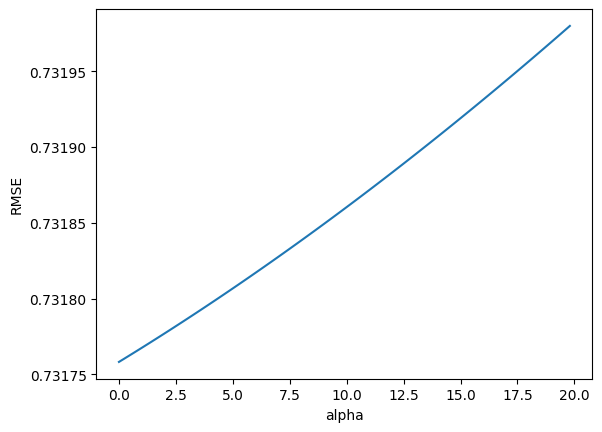

In [65]:
plt.plot(np.arange(0, 20, 0.2), scores)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

### 5. Model validation

Develop one function that performs the repeated holdout test.

In [66]:
def repeated_hold_out(X, y, k, test_ratio):
  """
  Input:
    - X: features
    - y: labels
    - test_ratio: ratio of the test set
  Output:
    - score: the average of k different test scores

  1. Iterate k times to perform k validation processes.
  2. For each iteration, split the dataset into training and test sets with *random* indices.
   - Note that each iteration should create different training and test sets.
  3. Use *standardization* to fix the scale of the dataset, you should only use the training set's properties.
  4. Fit your model with *solver* (without ridge) on the training set.
  5. Save your *MAE* score into the list *scores*
  6. After all the iterations, return the average of *scores*.

  """
  scores = []

  for k in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio)
    X_train_standardized, X_test_standardized = apply_standardization(X_train, X_test)
    theta = solver(X_train_standardized, y_train)
    mae = mean_absolute_error(X_test_standardized, y_test, theta)
    scores.append(mae)
  holdout_score = sum(scores)/len(scores)

  return holdout_score

In [67]:
holdout_score = repeated_hold_out(X, y, k = 3, test_ratio = 0.2)
holdout_score

0.5346146175290055

### 6. Put things together

In [68]:
def pipeline(X, y, k = 5, test_ratio = 0.2, norm_method = "standardization", eval_method = "RMSE", alpha = 0):
  """
  Input:
    - X: features
    - y: labels
    - test_ratio: ratio of the test set
  Output:
    - score: the average of k different test scores

  1. Iterate k times to perform k validation processes.
  2. For each iteration, split the dataset into the training and test sets with *random* indices.
   - Note that each iteration should create different training and test sets.
  3. Check the parameter *norm_method*
    - if norm_method == standardization:
      - Use *standardization* to fix the scale of the dataset, you should only use the training set's properties.
    - if norm_method == normalization:
      - Use *normalization* to fix the scale of the dataset, you should only use the training set's properties.
  4. Fit your model with *solver_with_ridge" on the training set. Use alpha from the parameter.
  5. Check the parameter "eval_method"
    - if eval_method == "RMSE"
      - Save your *RMSE* score into the list *scores*
    - if eval_method == "MAE"
      - Save your *MAE* score into the list *scores*

  6. After all the iterations, return the average of *scores*.

  """
  scores = []

  for k in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio)
    if norm_method == "standardization":
      X_train, X_test = apply_standardization(X_train, X_test)
    elif norm_method == "normalization":
      X_train, X_test = apply_normalization(X_train, X_test)
      
    theta = solver_with_ridge(X_train, y_train, alpha)
    
    if eval_method == "RMSE":
      scores.append(rooted_mean_squared_error(X_test, y_test, theta))
    elif eval_method == "MAE":
      scores.append(mean_absolute_error(X_test, y_test, theta))

  scores = sum(scores)/len(scores)
  
  return scores